In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
pio.renderers.default = "notebook_connected"
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Read Data

In [48]:
df = pd.read_csv(r'/kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv')

In [49]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


**Key Data Features** 
- Date : 
Daily records from [start_date] to [end_date].

- Store ID & Product ID : 
Unique identifiers for stores and products.

- Category : 
Product categories like Electronics, Clothing, Groceries, etc.

- Region : 
Geographic region of the store.

- Inventory Level : 
Stock available at the beginning of the day.

- Units Sold : 
Units sold during the day.

- Demand Forecast : 
Predicted demand based on past trends.

- Weather Condition : 
Daily weather impacting sales.

- Holiday/Promotion : 
Indicators for holidays or promotions.



# Exploring Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [51]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [52]:
df.duplicated().sum()

0

**Drop Unneeded Columns & Rename Columns**

In [53]:
df.drop(columns=['Date', 'Store ID', 'Product ID'], axis=1, inplace=True)

In [54]:
df = df.rename(columns={'Inventory Level': 'Inventory', 
                        'Units Sold': 'Sales', 
                        'Units Ordered': 'Orders', 
                        'Demand Forecast': 'Demand', 
                        'Weather Condition': 'Weather', 
                        'Holiday/Promotion': 'Promotion', 
                        'Competitor Pricing': 'Competitor Price'})

**Box Plots for Numarical Columns**

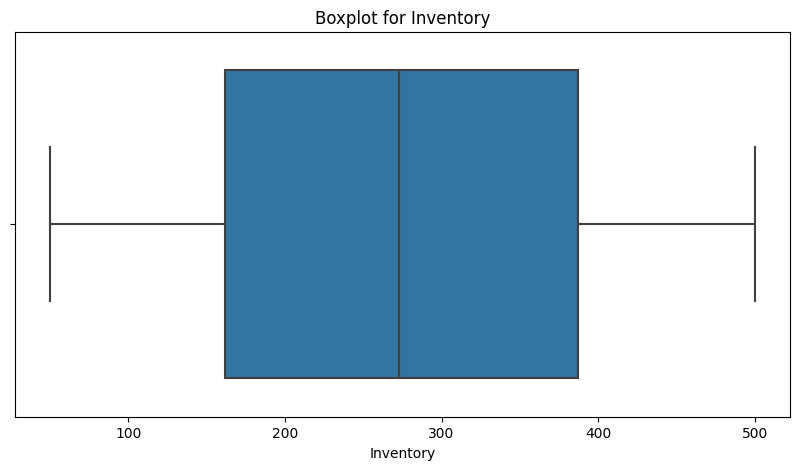

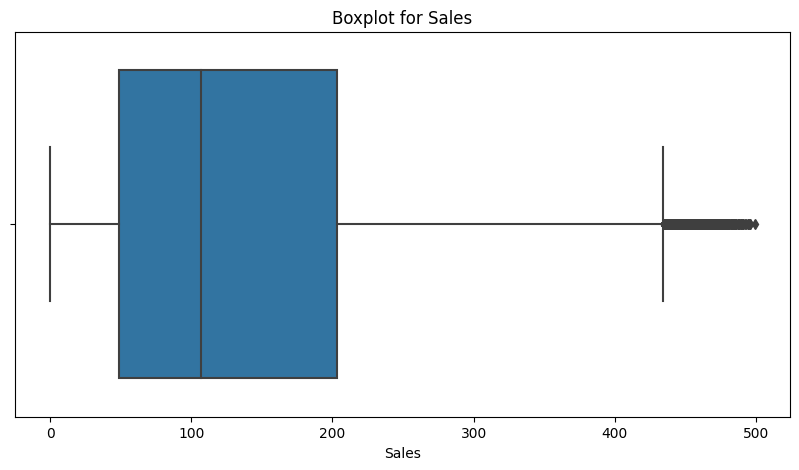

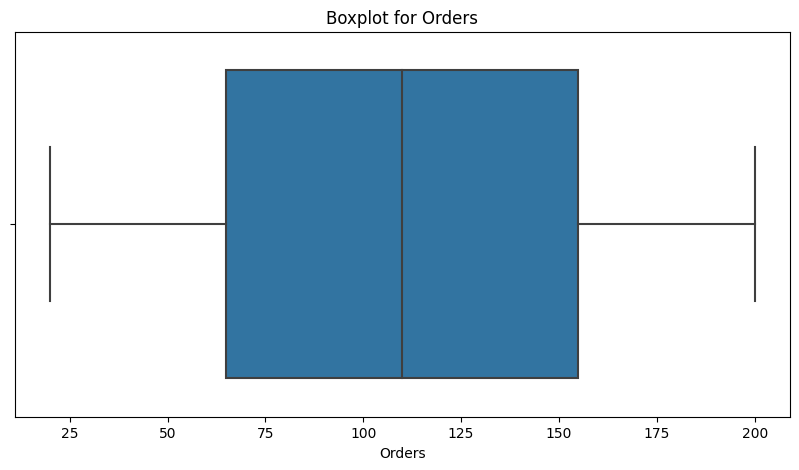

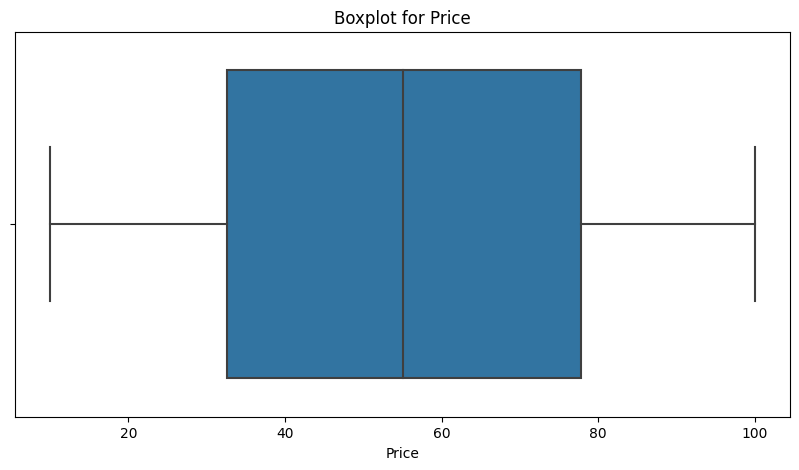

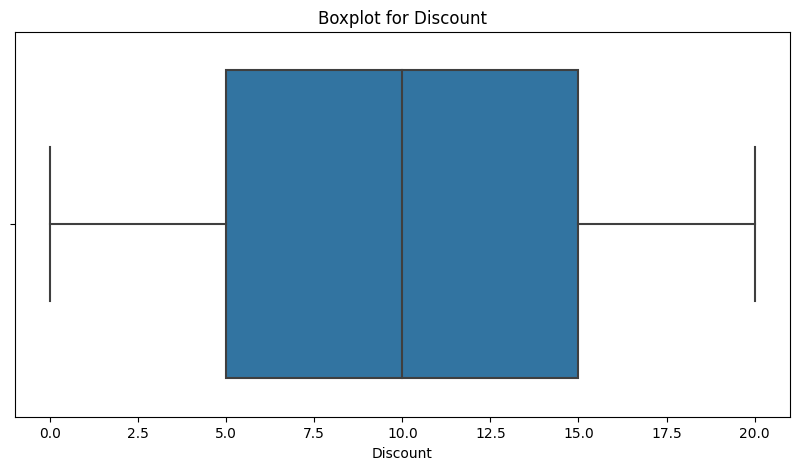

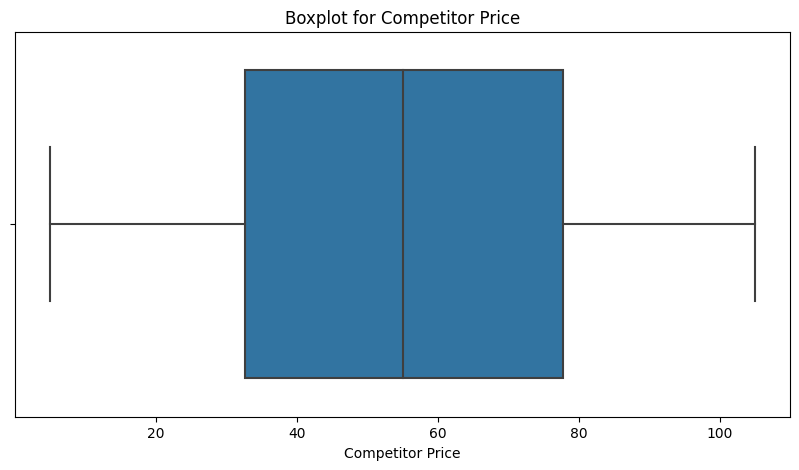

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

numarical_columns = ['Inventory', 'Sales', 'Orders', 'Price', 'Discount', 'Competitor Price']

for col in numarical_columns:
    plt.figure(figsize=(10, 5))  # Adjust the figure size
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

- **Inventory**: The median inventory level is around 200, with a range of 100 to 500. There are some outliers with inventory levels above 500, indicating potential stockpiling or overstocking.

- **Sales**: The median sales are around 100, with a range of 50 to 200. There are some outliers with sales above 200, indicating high demand or promotional activities.

- **Orders**: The median orders are around 100, with a range of 50 to 200. Similar to sales, there are outliers with orders above 200, indicating high demand or restocking.

- **Price**: The median price is around 30, with a range of 10 to 70. There are outliers with prices above 70, indicating premium products or high-margin items.

- **Discount**: The median discount is around 10%, with a range of 0 to 20%. There are outliers with discounts above 20%, indicating aggressive pricing strategies or clearance sales.

- **Competitor Price**: The median competitor price is around 30, with a range of 20 to 60. There are outliers with competitor prices above 60, indicating high competition or premium products.





# Exploratory Data Analysis (EDA)

## Univariate Analysis

**1-Category**

In [56]:
CategoryCounts = df['Category'].value_counts().reset_index()
CategoryCounts

,Category,count
0,Furniture,14699
1,Toys,14643
2,Clothing,14626
3,Groceries,14611
4,Electronics,14521


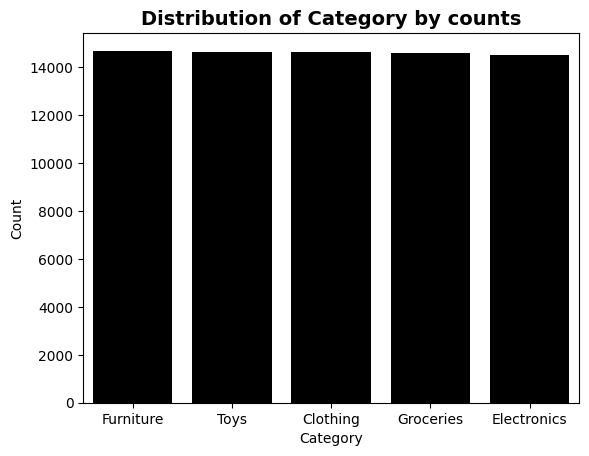

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=CategoryCounts, x='Category', y='count', color='#000000')
plt.title("Distribution of Category by counts", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**2-Region**

In [58]:
RegionCounts = df['Region'].value_counts().reset_index()
RegionCounts

,Region,count
0,East,18349
1,South,18297
2,North,18228
3,West,18226


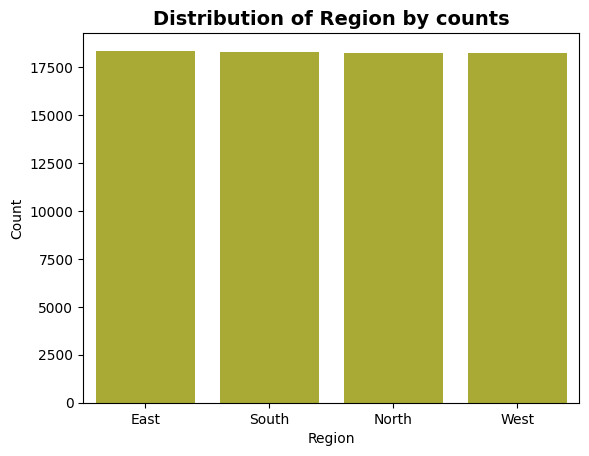

In [59]:
sns.barplot(data=RegionCounts, x='Region', y='count', color='#bcbd22')
plt.title("Distribution of Region by counts", fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

**3-Inventory**

In [60]:
InventoryDes = df['Inventory'].describe()
InventoryDes

count    73100.000000
mean       274.469877
std        129.949514
min         50.000000
25%        162.000000
50%        273.000000
75%        387.000000
max        500.000000
Name: Inventory, dtype: float64

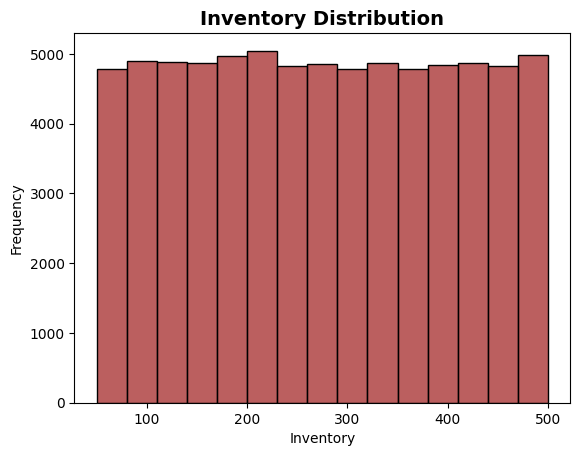

In [61]:
# Histogram using Seaborn
sns.histplot(data=df, x='Inventory', bins=15, color='brown')
plt.title("Inventory Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Inventory")
plt.ylabel("Frequency")
plt.show()

**4-Sales**

In [62]:
SalesDes = df['Sales'].describe()
SalesDes

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Sales, dtype: float64

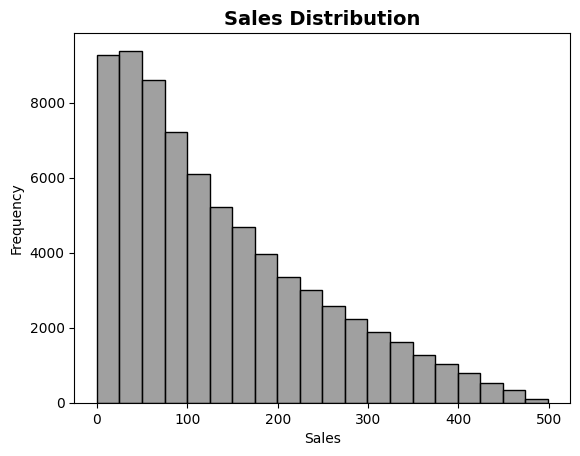

In [63]:
sns.histplot(data=df, x='Sales', bins=20, color='grey')
plt.title("Sales Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

 - The average sales per item is around 136 units, with a standard deviation of 109 units.
 - The minimum sales per item is 0 units, indicating that some items did not sell at all.
 - The maximum sales per item is 499 units, indicating a high demand for certain items.
 - The median sales per item is 107 units, indicating that half of the items sold more than 107 units.
 - The 25th percentile of sales is 49 units, indicating that a quarter of the items sold less than 49 units.
 - The 75th percentile of sales is 203 units, indicating that a quarter of the items sold more than 203 units.



**5-Orders**

In [64]:
OrdersDes = df['Orders'].describe()
OrdersDes

count    73100.000000
mean       110.004473
std         52.277448
min         20.000000
25%         65.000000
50%        110.000000
75%        155.000000
max        200.000000
Name: Orders, dtype: float64

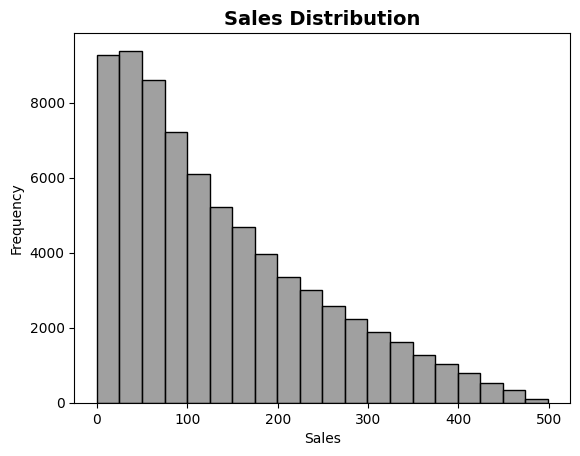

In [65]:
# Histogram using Seaborn
sns.histplot(data=df, x='Sales', bins=20, color='grey')
plt.title("Sales Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

**6-Demand**

In [66]:
DemandDes = df['Demand'].describe()
DemandDes

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand, dtype: float64

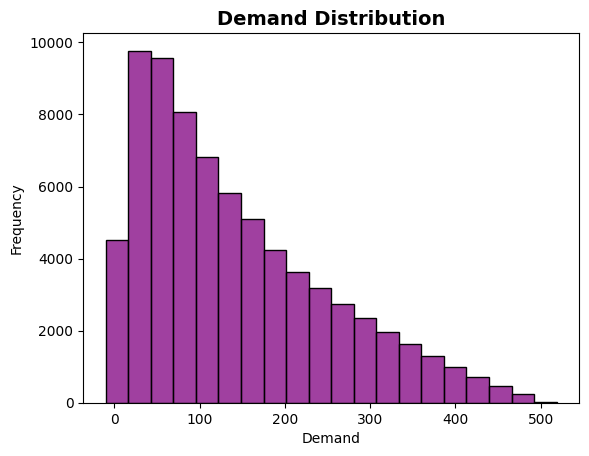

In [67]:
sns.histplot(data=df, x='Demand', bins=20, color='purple')
plt.title("Demand Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.show()

From the DemandDes statistics, we can observe the following insights:

1. **Mean Demand**: The average demand is around 141.49 units, indicating a moderate level of demand.
2. **Standard Deviation**: The standard deviation of demand is 109.25 units, indicating a significant variation in demand.
3. **Minimum Demand**: The minimum demand is -9.99 units, which might indicate errors in data collection or unusual circumstances.
4. **Maximum Demand**: The maximum demand is 518.55 units, indicating a high demand scenario.
5. **Quartiles**: The 25th percentile is 53.67 units, the median is 113.02 units, and the 75th percentile is 208.05 units, indicating a skewed distribution with a long tail towards higher demand.

The histogram fig of Demand provides a visual representation of the demand distribution. From the histogram, we can infer:

1. **Skewed Distribution**: The demand distribution is skewed to the right, indicating that there are more instances of higher demand.
2. **Peak Demand**: The histogram shows a peak around the median demand (113.02 units), indicating that most of the demand is concentrated around this value.
3. **Variation in Demand**: The histogram also shows a significant variation in demand, with some instances of very high demand (above 400 units) and some instances of low demand (below 50 units).



**7-Price**

In [68]:
PriceDes = df['Price'].describe()
PriceDes

count    73100.000000
mean        55.135108
std         26.021945
min         10.000000
25%         32.650000
50%         55.050000
75%         77.860000
max        100.000000
Name: Price, dtype: float64

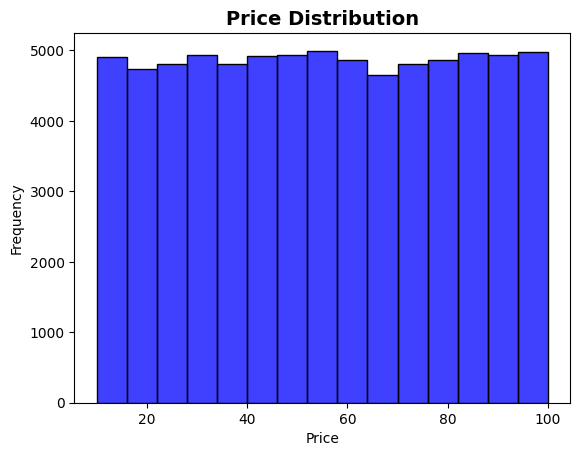

In [69]:
sns.histplot(data=df, x='Price', bins=15, color='blue')
plt.title("Price Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**8-Discount**

In [70]:
DiscountCounts = df['Discount'].value_counts().reset_index()
DiscountCounts

,Discount,count
0,20,14715
1,0,14662
2,15,14624
3,5,14591
4,10,14508


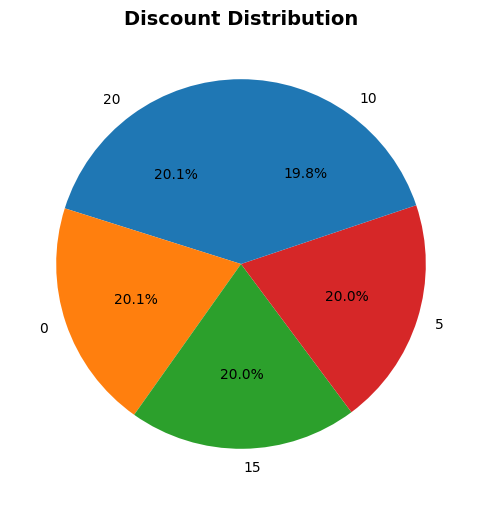

In [71]:
plt.figure(figsize=(10, 6))
plt.pie(DiscountCounts['count'], labels=DiscountCounts['Discount'], colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Discount Distribution", fontsize=14, fontweight='bold')
plt.show()

**9-Weather**

In [72]:
WeatherCounts = df['Weather'].value_counts().reset_index()
WeatherCounts

,Weather,count
0,Sunny,18290
1,Rainy,18278
2,Snowy,18272
3,Cloudy,18260


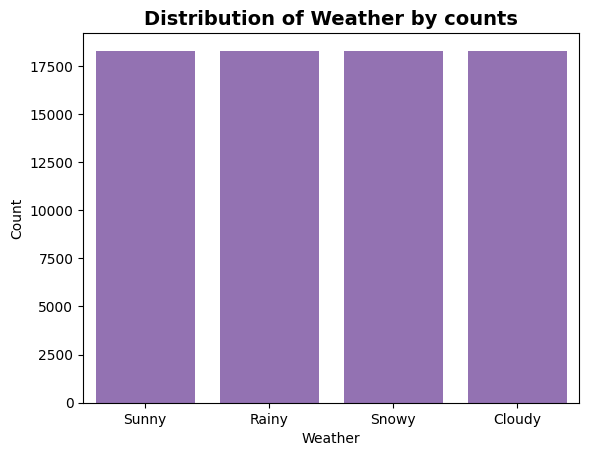

In [73]:
sns.barplot(data=WeatherCounts, x='Weather', y='count', color='#9467bd')
plt.title("Distribution of Weather by counts", fontsize=14, fontweight='bold')
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

**10-Promotion**

In [74]:
PromotionCounts = df['Promotion'].value_counts().reset_index()
PromotionCounts

,Promotion,count
0,0,36747
1,1,36353


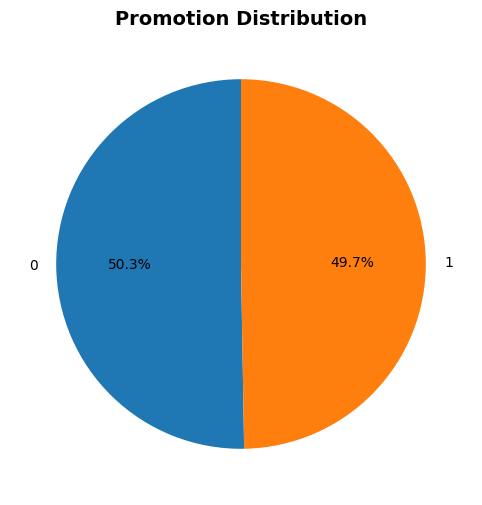

In [75]:
plt.figure(figsize=(10, 6))
plt.pie(PromotionCounts['count'], labels=PromotionCounts['Promotion'], 
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Promotion Distribution", fontsize=14, fontweight='bold')
plt.show()

**11-Competitor Price**

In [76]:
CompetitorPriceDes = df['Competitor Price'].describe()
CompetitorPriceDes

count    73100.000000
mean        55.146077
std         26.191408
min          5.030000
25%         32.680000
50%         55.010000
75%         77.820000
max        104.940000
Name: Competitor Price, dtype: float64

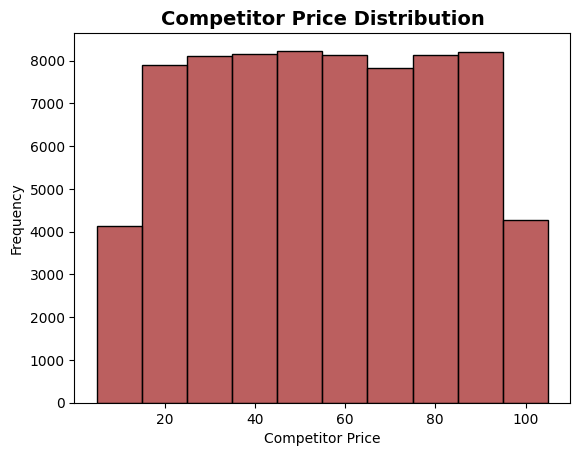

In [77]:
sns.histplot(data=df, x='Competitor Price', bins=10, color='brown')
plt.title("Competitor Price Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Competitor Price")
plt.ylabel("Frequency")
plt.show()

1. 

**12-Seasonality**

In [78]:
SeasonalityCounts = df['Seasonality'].value_counts().reset_index()
SeasonalityCounts

,Seasonality,count
0,Spring,18317
1,Summer,18305
2,Winter,18285
3,Autumn,18193


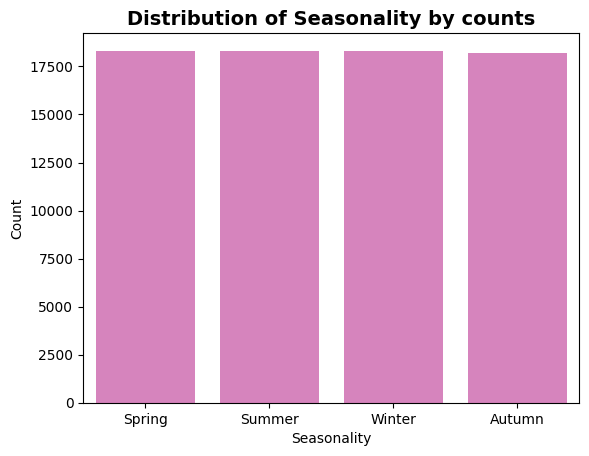

In [79]:
sns.barplot(data=SeasonalityCounts, x='Seasonality', y='count', color='#e377c2')
plt.title("Distribution of Seasonality by counts", fontsize=14, fontweight='bold')
plt.xlabel("Seasonality")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

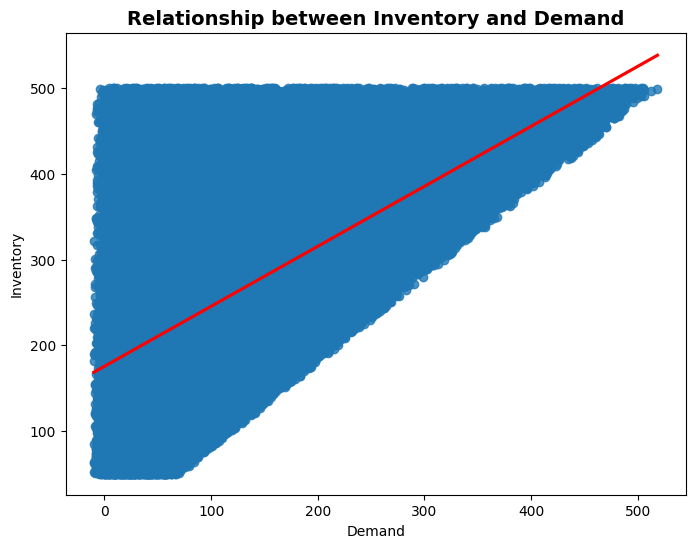

In [ ]:
numarical_columns = ['Inventory', 'Sales', 'Orders', 'Price', 'Discount', 'Competitor Price']
for col in numarical_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x='Demand', y=col, line_kws={"color": "red"})  # Add regression line
    plt.title(f'Relationship between {col} and Demand', fontsize=14, fontweight='bold')
    plt.xlabel('Demand')
    plt.ylabel(col)
    plt.show()


 - Inventory vs Demand: The scatter plot shows a moderate positive correlation between Inventory and Demand. This suggests that as inventory levels increase, demand also tends to increase. However, there are some outliers where high inventory levels do not necessarily translate to high demand.
 
 - Sales vs Demand: The scatter plot reveals a strong positive correlation between Sales and Demand. This is expected, as demand is a key driver of sales. The plot suggests that as demand increases, sales also increase proportionally.
 
 - Orders vs Demand: The scatter plot shows a moderate positive correlation between Orders and Demand. This indicates that as demand increases, the number of orders also tends to increase. However, there are some instances where high demand does not result in a corresponding increase in orders.
 
 - Price vs Demand: The scatter plot reveals a weak negative correlation between Price and Demand. This suggests that as prices increase, demand tends to decrease. However, the relationship is not strong, indicating that other factors also influence demand.
 
 - Discount vs Demand: The scatter plot shows a moderate positive correlation between Discount and Demand. This indicates that offering discounts can increase demand, as customers are more likely to purchase products at discounted prices.
 
 - Competitor Price vs Demand: The scatter plot reveals a weak negative correlation between Competitor Price and Demand. This suggests that if competitors' prices are high, demand for our products may increase. However, the relationship is not strong, indicating that other factors also influence demand.




## Multivariate Analysis

In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
numarical_columns = ['Inventory','Sales','Orders','Price','Discount','Competitor Price','Promotion','Demand']

corr_matrix = df[numarical_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True)

plt.show()

# Preprocessing

**1-Detrmine X & Y**

In [ ]:
x=df.drop(columns=['Demand'])
y=df['Demand']

**2-Encoding**

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Category'] = label_encoder.fit_transform(x['Category'])
x['Region'] = label_encoder.fit_transform(x['Region'])
x['Weather'] = label_encoder.fit_transform(x['Weather'])
x['Seasonality'] = label_encoder.fit_transform(x['Seasonality'])
x['Promotion'] = label_encoder.fit_transform(x['Promotion'])


In [ ]:
x.head()

**3-Scale Data**

In [ ]:

from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

In [ ]:
y_train.value_counts(normalize=True)*100

## Data Modelling

In [ ]:
from tabulate import tabulate

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calculate metrics
    train_r2 = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Prepare the table data
    metrics = [
        ["Training R² Score", f"{train_r2:.4f}"],
        ["Testing R² Score", f"{test_r2:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.2f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
        ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
    ]
    
    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

**1-LinearRegression**

In [ ]:
import pickle

lr = LinearRegression()

lr.fit(x_train, y_train)

# Enregistrer le modèle avec pickle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
# Evaluate the model
evaluate_model(lr, x_train, y_train, x_test, y_test)

**2-Support Vector Regression**

In [ ]:
svr = SVR()

svr.fit(x_train, y_train)

In [ ]:
evaluate_model(svr, x_train, y_train, x_test, y_test)

**3-DecisionTreeRegressor**

In [ ]:
DT = DecisionTreeRegressor()

DT.fit(x_train, y_train)

In [ ]:
evaluate_model(DT, x_train, y_train, x_test, y_test)

**4-KNeighborsRegressor**

In [ ]:
KNR = KNeighborsRegressor()

KNR.fit(x_train,y_train)

In [ ]:
evaluate_model(KNR, x_train, y_train, x_test, y_test)

# **Summary of Models and Best Model Selection**

After evaluating the performance of the four regression models — **LinearRegression**, **SVR (Support Vector Regression)**, **DecisionTreeRegressor**, and **KNeighborsRegressor** — on the retail store dataset, the results are summarized as follows:

| **Model**                | **Training R²** | **Testing R²** | **MSE** | **RMSE** | **MAE** |
|---------------------------|-----------------|----------------|---------|----------|---------|
| **LinearRegression**      | 0.9937          | 0.9937         | 74.79   | 8.65     | 7.47    |
| **SVR**                   | 0.9792          | 0.9781         | 260.54  | 16.14    | 11.52   |
| **DecisionTreeRegressor** | 1.0000          | 0.9871         | 154.04  | 12.41    | 10.13   |
| **KNeighborsRegressor**   | 0.9608          | 0.9430         | 679.04  | 26.06    | 21.00   |

---

## **Model Analysis**

1. **LinearRegression**  
   - **Training R² Score**: 0.9937  
   - **Testing R² Score**: 0.9937  
   - **MSE**: 74.79  
   - **RMSE**: 8.65  
   - **MAE**: 7.47  
   - This model provided **excellent performance**, with low errors and high consistency between training and testing scores, suggesting a well-fitting model.

2. **SVR (Support Vector Regression)**  
   - **Training R² Score**: 0.9792  
   - **Testing R² Score**: 0.9781  
   - **MSE**: 260.54  
   - **RMSE**: 16.14  
   - **MAE**: 11.52  
   - The SVR model showed **good performance** but had higher errors compared to LinearRegression. It captures non-linear relationships but does not outperform LinearRegression.

3. **DecisionTreeRegressor**  
   - **Training R² Score**: 1.0000  
   - **Testing R² Score**: 0.9871  
   - **MSE**: 154.04  
   - **RMSE**: 12.41  
   - **MAE**: 10.13  
   - This model exhibited **overfitting** (perfect Training R² score) but performed decently on the test set. The errors are higher than LinearRegression, indicating it may not generalize as well.

4. **KNeighborsRegressor**  
   - **Training R² Score**: 0.9608  
   - **Testing R² Score**: 0.9430  
   - **MSE**: 679.04  
   - **RMSE**: 26.06  
   - **MAE**: 21.00  
   - This model had the **worst performance**, with the highest error rates and the lowest R² scores. It does not capture the data patterns as effectively as the other models.

---

## **Best Model: LinearRegression**

Based on the evaluation metrics, **LinearRegression** is the best model for predicting demand in the retail store dataset. It provides:

- **The highest Testing R² score (0.9937)**  
- **The lowest error rates (MSE = 74.79, RMSE = 8.65, MAE = 7.47)**  
- **Consistent performance** between training and testing, indicating no overfitting or underfitting.

Therefore, **LinearRegression** is the most reliable choice for this dataset. ✅
